In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# QUESTIONS:
# How does the average online shopping expenditure of Gen Z compare to that of Millennials?
# Which age group or generation tends to make more purchases when discounts or promotions are offered?


#  - - - - - - - - - - - - - - - - - - -    READING DATASET  - - - - - - - - - - - - - - - - - - -    




In [3]:
csv_path = Path("archive/shopping_trends_updated.csv");

In [4]:
df = pd.read_csv(csv_path);
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# total num of dataset
df["Customer ID"].count()

3900

In [6]:
# Getting max and Min ages in the sample
print(df["Age"].max())
print(df["Age"].min())

70
18


In [7]:
# Creating bins
bins = [13, 26, 42, 59, 69]
# Creating group labels
group_labels = ["Gen Z (13-26)", "Millenials (27-42)", "Gen X (43-59)", "Baby Boomers (60-69)"];

df["Generation Group"] =  pd.cut(df["Age"], bins, labels=group_labels)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Generation Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X (43-59)
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z (13-26)
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X (43-59)
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z (13-26)
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X (43-59)


In [8]:
gen_group_count = pd.DataFrame(df.groupby("Generation Group")["Customer ID"].count())
gen_group_count

,Customer ID
Generation Group,
Gen Z (13-26),640
Millenials (27-42),1200
Gen X (43-59),1272
Baby Boomers (60-69),721


In [9]:



#  - - - - - - - - - - - - - - - - - - -    CLEANING DATASET  - - - - - - - - - - - - - - - - - - -    




In [10]:
# dropping all Silent Generations
df = df.drop(df[df["Generation Group"]=="The Silent Generation (70-78)"].index)

In [11]:
# assigning the count of each gen to variables
gen_z_count  = gen_group_count.loc['Gen Z (13-26)', "Customer ID"]
millenials_count = gen_group_count.loc['Millenials (27-42)', "Customer ID"]
gen_x_count = gen_group_count.loc['Gen X (43-59)', "Customer ID"]
baby_boomers_count = gen_group_count.loc['Baby Boomers (60-69)', "Customer ID"]

# Dropping samples from Millenials, Gen X and Baby Boomers to match the number with Gen Z (lowest sample count)
filterCondition = df["Generation Group"]=="Millenials (27-42)"
df = df.drop(df[filterCondition].sample(n=(millenials_count-gen_z_count), random_state=42).index)

filterCondition = df["Generation Group"]=="Gen X (43-59)"
df = df.drop(df[filterCondition].sample(n=(gen_x_count-gen_z_count), random_state=42).index)

filterCondition = df["Generation Group"]=="Baby Boomers (60-69)"
df = df.drop(df[filterCondition].sample(n=(baby_boomers_count-gen_z_count), random_state=42).index)


gen_group_count = pd.DataFrame(df.groupby("Generation Group")["Customer ID"].count())
gen_group_count

,Customer ID
Generation Group,
Gen Z (13-26),640
Millenials (27-42),640
Gen X (43-59),640
Baby Boomers (60-69),640


In [12]:



#  - - - - - - - - - - - - - - - - - - -    PLOTTING  - - - - - - - - - - - - - - - - - - -    


# QUESTION: How does the average online shopping expenditure of Gen Z compare to that of Millennials?

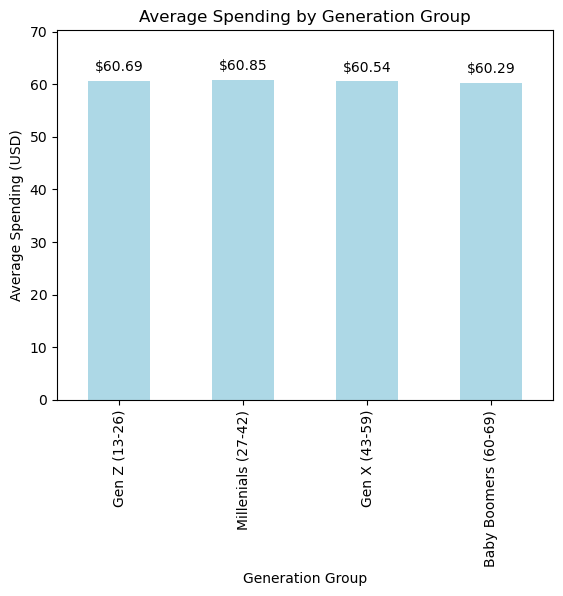

In [13]:
# Grouping the data by 'Generation Group' and calculating the average spending

average_spending = df.groupby('Generation Group')['Purchase Amount (USD)'].mean()
# Filtering out the Silent Generation

# Plotting the average spending
ax = average_spending.plot(kind='bar', color='lightblue', align='center')
plt.ylabel('Average Spending (USD)')
plt.title('Average Spending by Generation Group')

# Displaying the value on each bar
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.ylim(top=ax.get_ylim()[1] * 1.1)


plt.show()

In [14]:


#  - - - - - - - - - - - - - - - - - - -    PLOTTING  - - - - - - - - - - - - - - - - - - -    


# QUESTION: Which age group or generation tends to make more purchases when discounts or promotions are offered?



In [15]:
grouped_df = df.groupby(['Generation Group', 'Discount Applied'])
grouped_df
# Aggregating the grouped data (e.g., getting the count of each group)
aggregated_df = grouped_df.size().reset_index(name='Count')
aggregated_df

,Generation Group,Discount Applied,Count
0,Gen Z (13-26),No,367
1,Gen Z (13-26),Yes,273
2,Millenials (27-42),No,368
3,Millenials (27-42),Yes,272
4,Gen X (43-59),No,375
5,Gen X (43-59),Yes,265
6,Baby Boomers (60-69),No,361
7,Baby Boomers (60-69),Yes,279


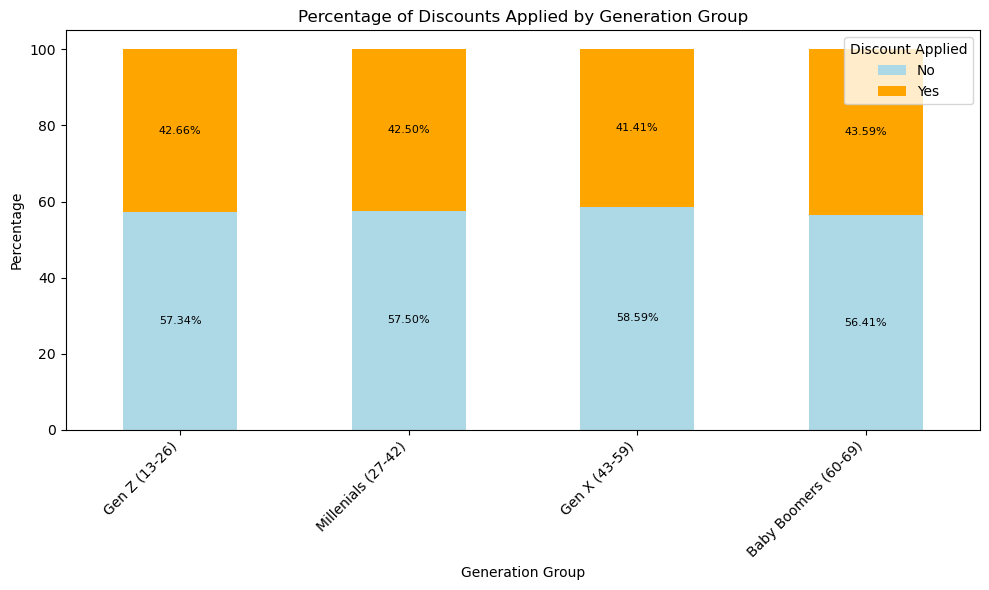

In [17]:
# Pivot the DataFrame to have "Discount Applied" as columns and "Count" as values
pivot_df = aggregated_df.pivot(index='Generation Group', columns='Discount Applied', values='Count')

# Calculate the percentage for each category
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plotting the bar graph
ax = pivot_df_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(10, 6))
plt.ylabel('Percentage')
plt.title('Percentage of Discounts Applied by Generation Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Discount Applied', loc='upper right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Annotating the percentage values on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)

plt.show()